In [2]:
import pandas as pd 
import numpy as np 

In [3]:
df = pd.read_csv('D:\\Python basics\\CLTV-360\\CSV files\\Cleaned_online_retail.csv',parse_dates=['InvoiceDate'])

In [4]:
df.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYear,InvoiceMonth,InvoiceDay,InvoiceTime,InvoiceWeekDay,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1,08:26,Wednesday,15.3


 Set Reference Date for Recency (max invoice date + 1)

In [5]:
reference_date = df["InvoiceDate"].max() + pd.Timedelta(days=1)
print("Reference Date:", reference_date.date())


Reference Date: 2011-12-10


 Create RFM Table

In [6]:
recency  =df.groupby("CustomerID")["InvoiceDate"].max().apply(lambda x: (reference_date - x).days)
customer_age = df.groupby("CustomerID")["InvoiceDate"].agg(lambda x:(x.max() - x.min()).days)
frequency = df.groupby("CustomerID")["InvoiceNo"].nunique()
monetary = df.groupby("CustomerID")["TotalPrice"].sum()
Churn_rate = 1 / (customer_age + 1)


 Combine into one DataFrame

In [7]:
rfm = pd.DataFrame ({
     "Recency": recency,
    "Customer_Age": customer_age,
    "Frequency": frequency,
    "Monetary": monetary,
    "ChurnProbab": Churn_rate
    
}).reset_index()

In [8]:
rfm.columns

Index(['CustomerID', 'Recency', 'Customer_Age', 'Frequency', 'Monetary',
       'ChurnProbab'],
      dtype='object')

Calculate Derived Features

In [9]:
rfm['AOV'] = rfm['Monetary'] / rfm['Frequency']
rfm['PurchaseFrequency'] = rfm['Frequency'] / (rfm['Customer_Age']+1)  
rfm = rfm.round(2)

In [10]:
rfm.columns

Index(['CustomerID', 'Recency', 'Customer_Age', 'Frequency', 'Monetary',
       'ChurnProbab', 'AOV', 'PurchaseFrequency'],
      dtype='object')

In [11]:
rfm.sort_values('Monetary',ascending=False).head(10)

,CustomerID,Recency,Customer_Age,Frequency,Monetary,ChurnProbab,AOV,PurchaseFrequency
1689,14646.0,2,353,72,279138.02,0.0,3876.92,0.20
4198,18102.0,1,366,60,259657.30,0.0,4327.62,0.16
3726,17450.0,8,359,46,194550.79,0.0,4229.36,0.13
3007,16446.0,1,204,2,168472.50,0.0,84236.25,0.01
1879,14911.0,1,372,199,140450.72,0.0,705.78,0.53
55,12415.0,24,313,20,124564.53,0.0,6228.23,0.06
1333,14156.0,10,361,55,117379.63,0.0,2134.18,0.15
3769,17511.0,3,370,31,91062.38,0.0,2937.50,0.08
0,12346.0,326,0,1,77183.60,1.0,77183.60,1.00
2701,16029.0,39,335,62,72882.09,0.0,1175.52,0.18


Save to CSV Folder

In [12]:
rfm.to_csv("D:\\Python basics\\CLTV-360\CSV files\\customer_features.csv", index=False)
print("✅ Saved: customer_features.csv")


✅ Saved: customer_features.csv


<>:1: SyntaxWarning: invalid escape sequence '\C'
<>:1: SyntaxWarning: invalid escape sequence '\C'
C:\Users\Saurav\AppData\Local\Temp\ipykernel_4696\1720576539.py:1: SyntaxWarning: invalid escape sequence '\C'
  rfm.to_csv("D:\\Python basics\\CLTV-360\CSV files\\customer_features.csv", index=False)


In [13]:
rfm['ChurnProbab']

0       1.00
1       0.00
2       0.00
3       1.00
4       1.00
        ... 
4330    1.00
4331    1.00
4332    0.01
4333    0.00
4334    0.01
Name: ChurnProbab, Length: 4335, dtype: float64

What We Did:
We created a churn rate per customer, likely based on recency or activity logic.
Each customer got a value between:
0.00 → Very active
1.00 → Fully churned
0.01 → Very low churn probability



In [14]:
import numpy as np

# If gross margin not available, assume 50%
gross_margin = 0.5

# Optional way to simulate lifespan using inverse of recency
rfm['Expected_Lifespan'] = 1 / (rfm['Recency'] + 1)  # Avoid division by zero
rfm['Expected_Lifespan'] =rfm['Expected_Lifespan'].round(3)
# Simple CLTV formula
rfm['CLTV'] = rfm['AOV'] * rfm['Frequency'] * rfm['Expected_Lifespan'] * gross_margin

# Round the values
rfm['CLTV'] = rfm['CLTV'].round(2)


In [15]:
rfm.columns

Index(['CustomerID', 'Recency', 'Customer_Age', 'Frequency', 'Monetary',
       'ChurnProbab', 'AOV', 'PurchaseFrequency', 'Expected_Lifespan', 'CLTV'],
      dtype='object')

***Create Segmentation Logic (Clustering)***


In [16]:
features = ['CustomerID', 'Recency', 'Customer_Age', 'Frequency', 'Monetary',
       'ChurnProbab', 'AOV', 'PurchaseFrequency', 'Expected_Lifespan', 'CLTV']

In [17]:
from sklearn. preprocessing import StandardScaler
scaler = StandardScaler()

In [18]:
x_scaled = scaler.fit_transform (rfm[features])

In [19]:
x_scaled

array([[-1.71546611,  2.3283718 , -0.98666805, ...,  1.04155724,
        -0.5589886 , -0.02435893],
       [-1.71488526, -0.9053206 ,  1.77689849, ..., -0.68032075,
         2.97325518,  0.35378096],
       [-1.71430442, -0.17674175,  1.14847103, ..., -0.69789094,
        -0.45195091, -0.09123697],
       ...,
       [ 1.73245882, -0.8454374 , -0.09324106, ..., -0.68032075,
         0.59701846, -0.09089768],
       [ 1.73303967, -0.88535953,  1.5346132 , ..., -0.6276102 ,
         1.5496539 ,  0.03414993],
       [ 1.73536307, -0.49611878,  0.20961555, ..., -0.68032075,
        -0.34491322, -0.08382912]], shape=(4335, 10))

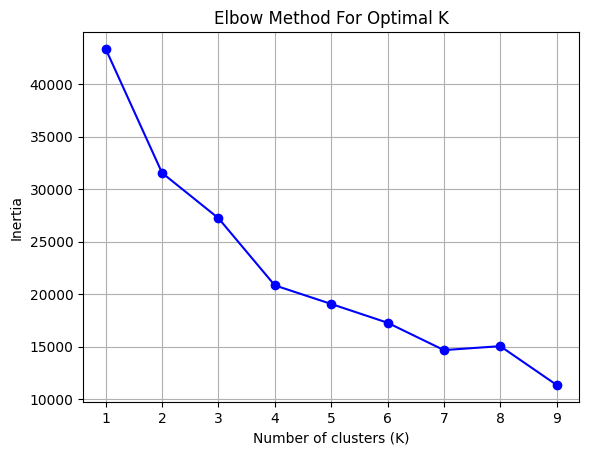

In [20]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
K = list(range(1, 10))  # Convert range to list for clarity

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal K')
plt.grid(True)
plt.show()


In [21]:
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Segment'] = kmeans.fit_predict(x_scaled)


In [22]:
final_segmented_df = rfm.copy()
final_segmented_df['Segment'] = rfm['Segment']


In [26]:
rfm['Segment'].value_counts()

Segment
2    2391
1    1578
0     361
3       5
Name: count, dtype: int64

In [24]:
final_segmented_df.to_csv('D:\\Python basics\\CLTV-360\\CSV files\\rfm_segments.csv', index=False)


CALCULATE CLTV 

In [25]:
rfm['CLTV']

0       115.78
1       717.61
2         9.34
3        36.44
4         0.44
         ...  
4330      0.36
4331      0.20
4332      9.88
4333    208.90
4334     21.13
Name: CLTV, Length: 4335, dtype: float64

🧾 CLTV Score Conclusion:

The CLTV scores range from as low as ₹0.20 to as high as ₹717.61, indicating a wide variation in customer value. A small segment of customers contributes significantly to revenue, while the majority have relatively low lifetime value. This suggests a strong case for customer segmentation, targeted retention strategies for high-value customers, and reactivation campaigns for low-value ones.

✅ Why use 1 / (Recency + 1) instead of raw Recency?
Recency measures the number of days (or weeks/months) since the customer's last purchase.

Lower Recency = Customer purchased recently → More valuable

Higher Recency = Long time since last purchase → Less valuable

If we directly use Recency, higher values will reduce CLTV, but in a linear way, which doesn't always reflect the true customer behavior.